In [1]:
# pandas
# 엑셀 데이터 => df
# (컬럼 - 인덱스 - 데이터값)
# 5가지 기능(시리즈의 연산, 필터링, apply groupby, pivot)
# 시각화 => 기계적

# EDA(탐색적 데이터 분석)
# Feature Engineering
#     - 숫자도 아니고, 카테고리도 아닌 데이터 처리
#     - 스케일링, 인코딩


# 모델 선택(하이퍼 파라미터 세팅)
# 생성
# 훈련
# 검증
# 예측

In [3]:
# 연속된 숫자 데이터 예측하기

In [144]:
import pandas as pd
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
temp = load_diabetes()

In [148]:
df_db = pd.DataFrame(temp['data'], columns=temp['feature_names'])

In [150]:
df_db['target'] = temp['target']

In [152]:
df_db.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<Figure size 640x480 with 0 Axes>

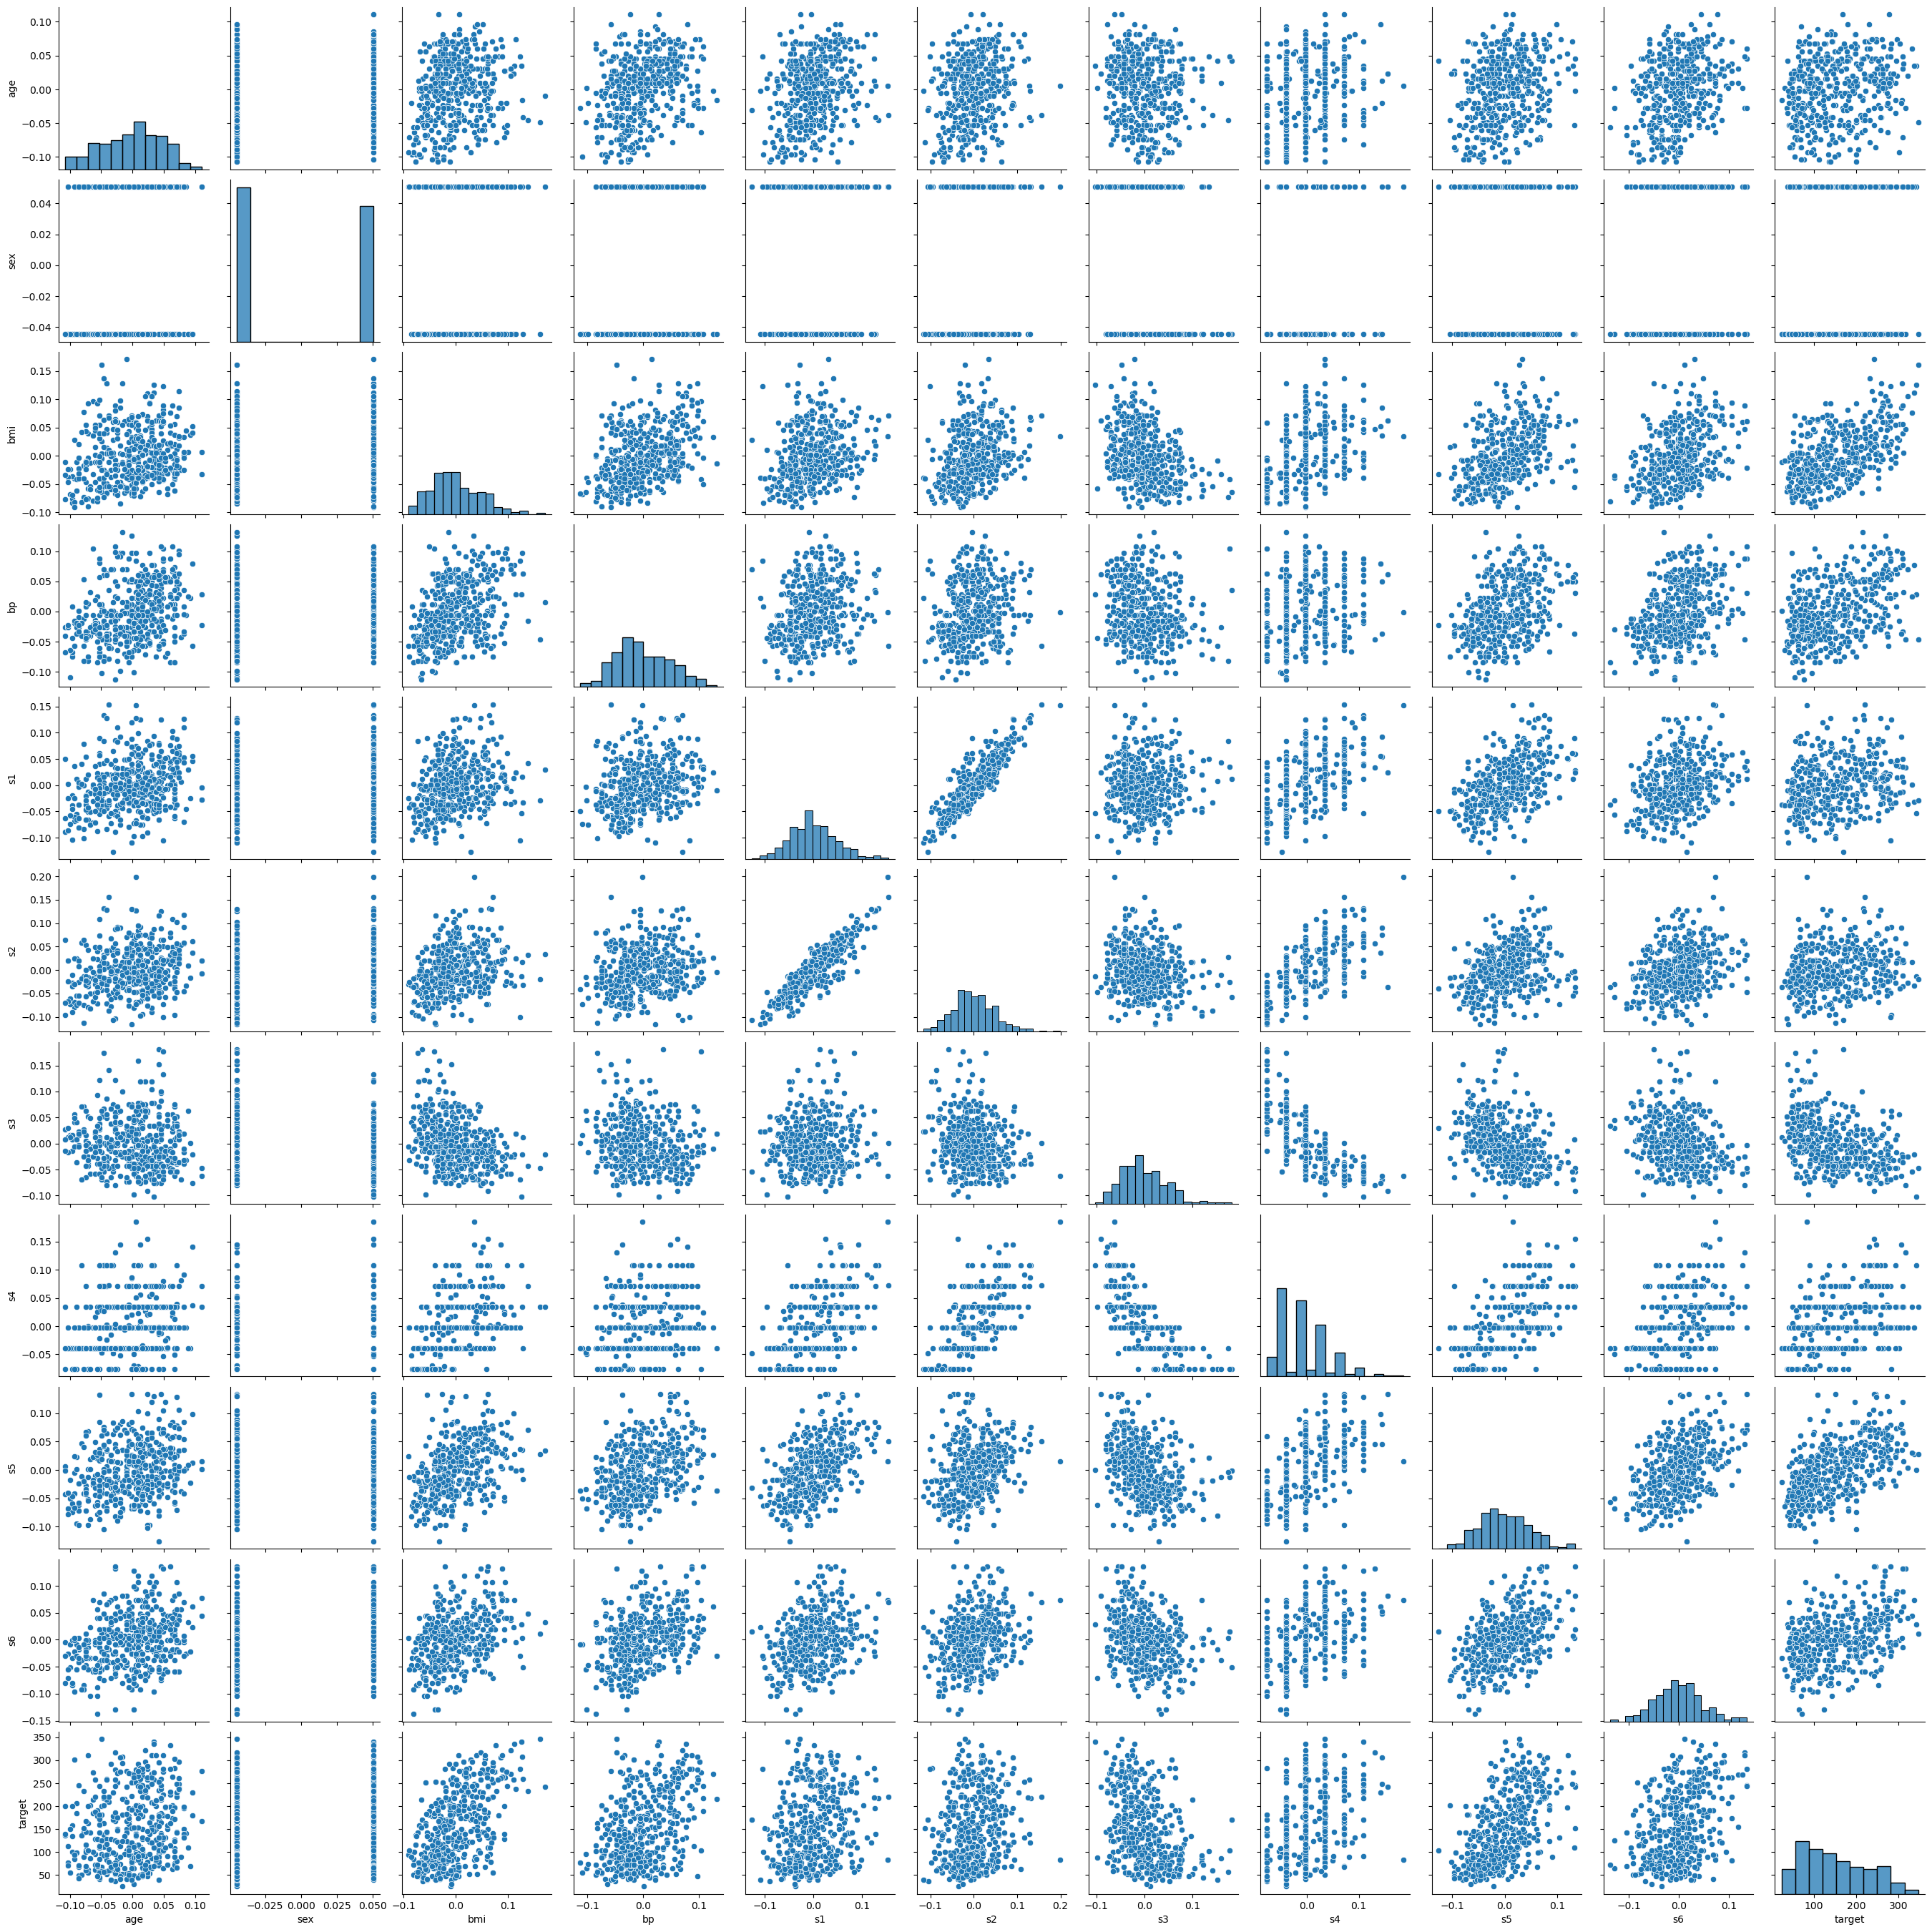

In [154]:
plt.figure()

sns.pairplot(df_db)

plt.show()

In [155]:
# 1. 선형회귀 모델 사용
# - feature와 target간의 선형관계를 가정
# - y = a1*x1 + a2*x2 + ... + c
# - 회귀계수 확인
# - 각 feature가 독립적이어야함!

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [157]:
y = df_db['target']
X = df_db.iloc[:, :-1]

train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=3)

In [158]:
# 1. 모델생성
linear_r = LinearRegression()
# 2. 훈련
linear_r.fit(train_x, train_y)

LinearRegression()

In [159]:
# 회귀계수 확인
# target 변수와 선형관계 파악

coef_sr = pd.Series(linear_r.coef_, index=train_x.columns)
np.abs(coef_sr).sort_values(ascending=False)

s5     598.119178
bmi    540.993163
s1     538.843400
bp     329.302111
sex    287.155875
s4     235.046327
s2     212.601930
s6     100.428424
s3      10.401429
age      0.352815
dtype: float64

In [160]:
# 3. 검증 => r-square(의미 없는 feature를 넣어도 적어도 떨어지지는 않음)
linear_r.score(valid_x, valid_y) # 0.43862187337165937

# 분류 모델에서 0.4라는건 40퍼 맞췄다는 의미
# 회귀 모델은 0~1에 값을 가지는데 0으로 갈 수록 평균이랑 다를게 없다는 의미, 1로 갈 수록 모델이 잘 예측된다는 모델
# 분류모델과는 검증방법이 다름
# 에러의 크기를 봄(에러의 차이를 절댓값으로 바꾼다음 더하기 or 에러의 차이를 제곱해서 더하고 루트씌우기 => rmse: root mean squared error: 값이 낮을 수록 좋은 모델)

0.43862187337165937

In [161]:
from sklearn.metrics import root_mean_squared_error

In [162]:
# rmse
root_mean_squared_error(valid_y, linear_r.predict(valid_x))

55.681176571013445

In [163]:
# s1, s2
# corr : -1 ~ 1

df_db.corr()

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

In [164]:
# s2를 뺐을 때
X2 = X.drop('s2', axis=1)

In [165]:
train_x2, valid_x2, train_y2, valid_y2 = train_test_split(X2, y,
                                                    test_size=0.3,
                                                     random_state=3)

# 1. 모델생성
linear_r2 = LinearRegression()
# 2. 훈련
linear_r2.fit(train_x2, train_y2)

print(linear_r2.score(valid_x2, valid_y2))
print(root_mean_squared_error(valid_y2, linear_r2.predict(valid_x2)))

0.43418481431377964
55.90079182958539


In [178]:
# 계수확인
coef_sr2 = pd.Series(linear_r2.coef_, index=train_x2.columns) 

In [180]:
coef_sr2

age      0.575580
sex   -288.295346
bmi    543.375581
bp     327.081339
s1    -288.069001
s3     -93.548562
s4     217.797848
s5     507.662738
s6     101.123889
dtype: float64

In [182]:
# 트리류 모델로 예측

In [184]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [190]:
# 기본 트리 모델
params = {'max_depth' : [5, 10, 20, 30], 'min_samples_leaf' : [1, 10, 20, 30]}
grid_tree = GridSearchCV(DecisionTreeRegressor(), params, cv=5)
grid_tree.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 10, 20, 30]})

In [192]:
grid_tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 30}

In [194]:
tree_r = DecisionTreeRegressor(max_depth=5, min_samples_leaf=30)
tree_r.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=30)

In [198]:
# feature 중요도 확인
pd.Series(tree_r.feature_importances_, index=train_x.columns)

age    0.000000
sex    0.000000
bmi    0.297231
bp     0.000000
s1     0.000000
s2     0.000000
s3     0.071003
s4     0.000000
s5     0.631766
s6     0.000000
dtype: float64

In [200]:
tree_r.score(valid_x, valid_y)

0.334890389900534

In [202]:
root_mean_squared_error(valid_y, tree_r.predict(valid_x))

60.60762579757716

In [204]:
# 랜덤포레스트
# 훈련 후 rmse 계산해보기
grid_rf = GridSearchCV(RandomForestRegressor(), params, cv=5)
grid_rf.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 10, 20, 30]})

In [206]:
grid_rf.best_params_

{'max_depth': 10, 'min_samples_leaf': 1}

In [216]:
rf_r = RandomForestRegressor(max_depth=10, min_samples_leaf=1)
rf_r.fit(train_x, train_y)

RandomForestRegressor(max_depth=10)

In [218]:
pd.Series(rf_r.feature_importances_, index=train_x.columns) # 나무 심을때마다 feature들을 랜덤 선택

age    0.052851
sex    0.013385
bmi    0.281944
bp     0.119227
s1     0.039990
s2     0.045995
s3     0.048855
s4     0.015585
s5     0.291415
s6     0.090752
dtype: float64

In [220]:
print(rf_r.score(valid_x, valid_y))
print(root_mean_squared_error(valid_y, rf_r.predict(valid_x)))

0.38818699078275676
58.12862013858127


In [222]:
## 자전거 수요 예측

In [304]:
train_path = r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\자전거 대여 데이터\train.csv'
test_path = r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\자전거 대여 데이터\test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [294]:
df_train

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

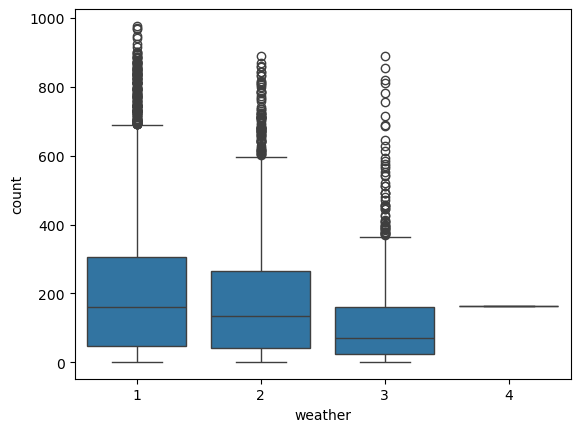

In [230]:
plt.figure()

sns.boxplot(df_train, x='weather', y='count')

plt.show()

In [234]:
# 결측 데이터
# 숫자데이터는 범위에 벗어나는 값도 결측 데이터

df_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [306]:
# feature engineering
# 시간 데이터를 카테고리나 숫자로 바꾸기

df_train['datetime2']=pd.to_datetime(df_train['datetime'])
df_train['year'] = df_train['datetime2'].dt.year
df_train['month'] = df_train['datetime2'].dt.month
df_train['day'] = df_train['datetime2'].dt.day
df_train['hour'] = df_train['datetime2'].dt.hour

In [308]:
df_test['datetime2']=pd.to_datetime(df_test['datetime'])
df_test['year'] = df_train['datetime2'].dt.year
df_test['month'] = df_train['datetime2'].dt.month
df_test['hour'] = df_train['datetime2'].dt.hour

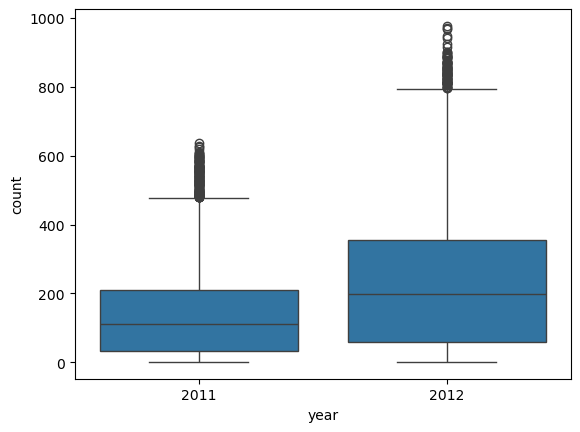

In [248]:
plt.figure()

sns.boxplot(df_train, x='year', y='count')

plt.show()

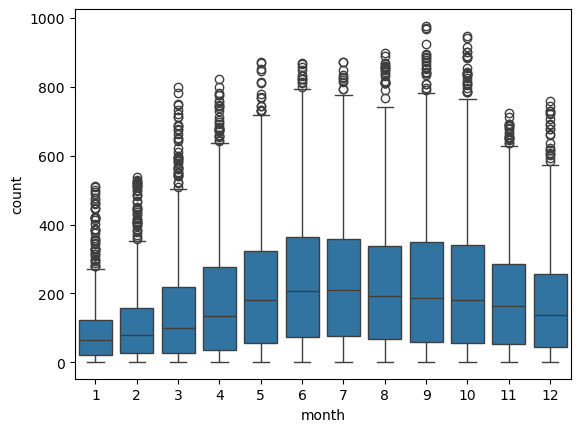

In [250]:
plt.figure()

sns.boxplot(df_train, x='month', y='count')

plt.show()

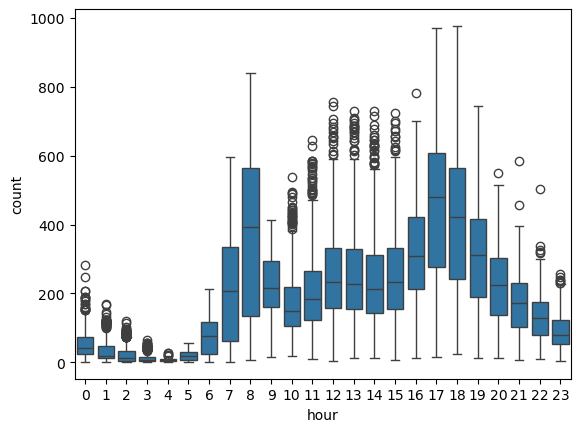

In [254]:
plt.figure()

sns.boxplot(df_train, x='hour', y='count')

plt.show()

In [300]:
# 스케일링 할 것들 : 'temp', 'humidity', 'windspeed', 'month', 'hour'
# 인코딩 할 것들 : 'season', 'holiday', 'workingday', 'weather', 'year'

df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime2', 'year', 'month', 'day', 'hour'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

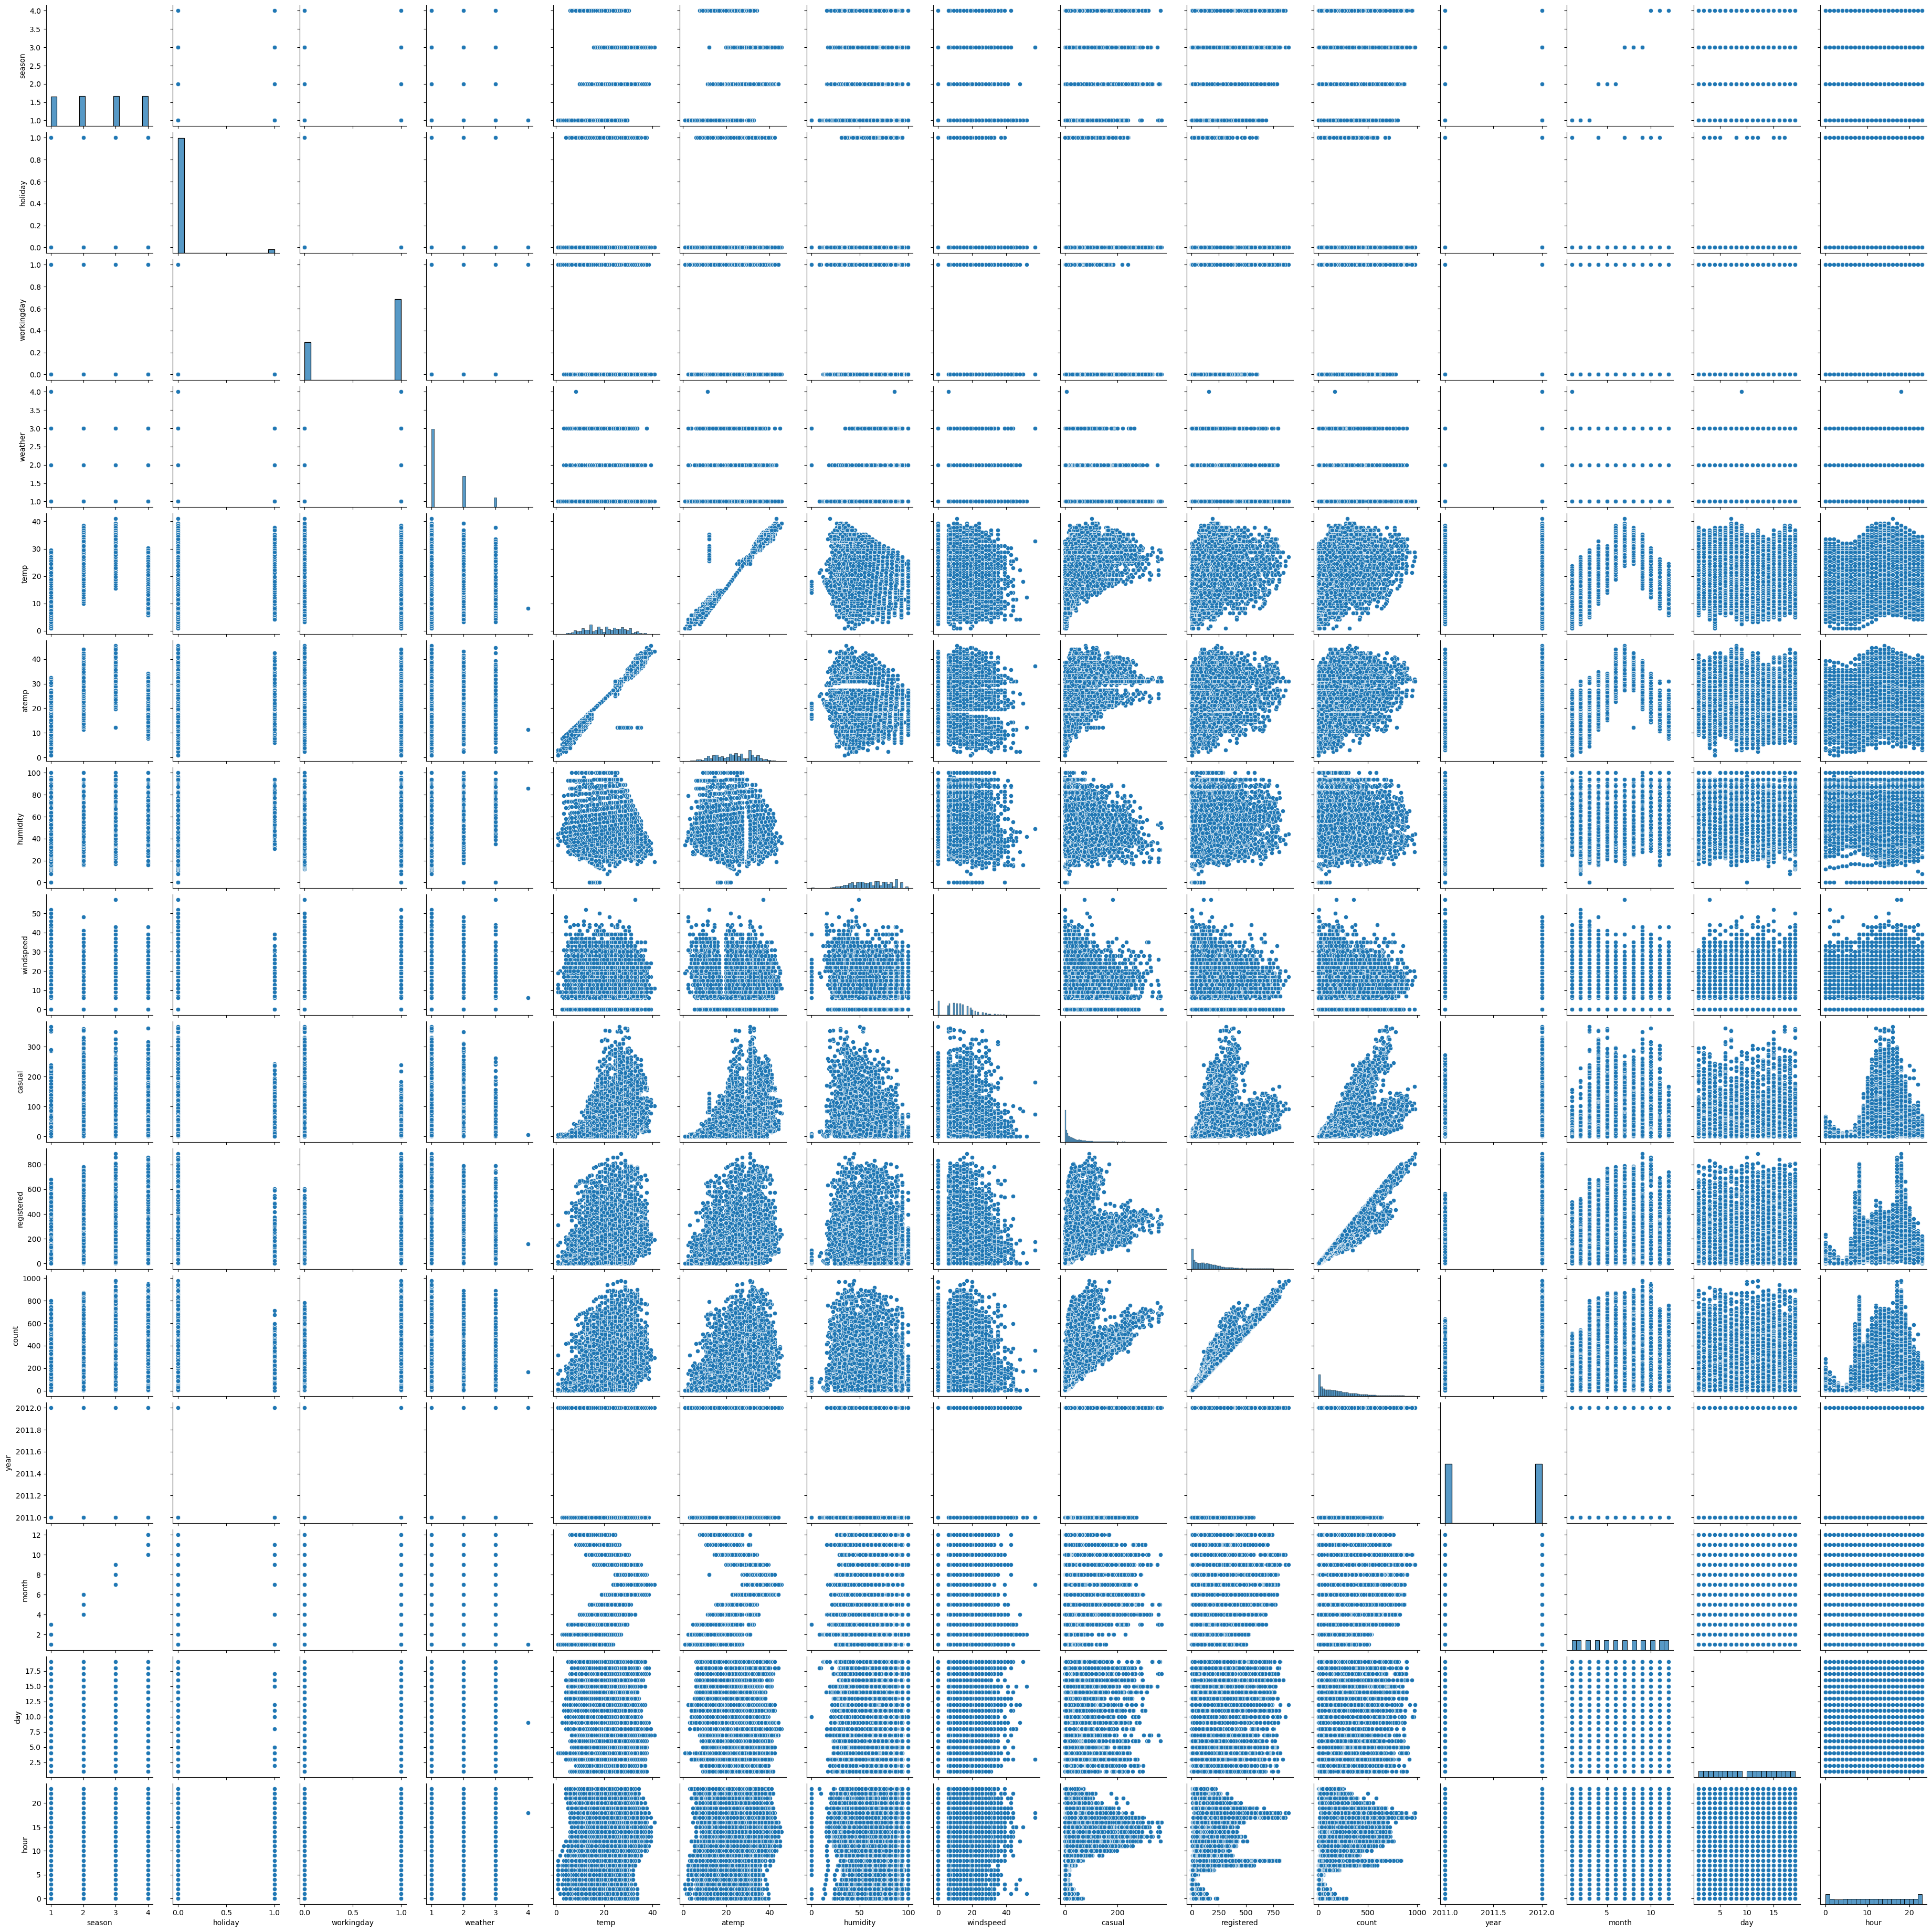

In [274]:
plt.figure()

sns.pairplot(df_train)

plt.show()

In [312]:
from sklearn.preprocessing import StandardScaler

# 1. 스케일러 생성
stndsclr = StandardScaler()

# 2. 스케일러를 훈련
sclr_list = ['temp', 'humidity', 'windspeed', 'month', 'hour']
stndsclr.fit(df_train[sclr_list])

# 3. 실제 적용(train, test)
new_sclr_list = []
for i in sclr_list:
    new_sclr_list.append(i+'_s')

df_train[new_sclr_list] = stndsclr.transform(df_train[sclr_list])
df_test[new_sclr_list] = stndsclr.transform(df_test[sclr_list])

In [315]:
encoding_list = ['season', 'holiday', 'workingday', 'weather', 'year']
df_train_fin = pd.get_dummies(df_train, columns=encoding_list, dtype='int', drop_first=True) # 원핫인코딩
df_test_fin = pd.get_dummies(df_test, columns=encoding_list, dtype='int', drop_first=True) # 원핫인코딩

In [321]:
df_train_fin.columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'datetime2', 'month', 'day', 'hour', 'temp_s',
       'humidity_s', 'windspeed_s', 'month_s', 'hour_s', 'season_2',
       'season_3', 'season_4', 'holiday_1', 'workingday_1', 'weather_2',
       'weather_3', 'weather_4', 'year_2012'],
      dtype='object')

In [324]:
feature_names = ['temp_s',
       'humidity_s', 'windspeed_s', 'month_s', 'hour_s', 'season_2',
       'season_3', 'season_4', 'holiday_1', 'workingday_1', 'weather_2',
       'weather_3', 'weather_4', 'year_2012']

X = df_train_fin[feature_names]
y = df_train_fin['count']

In [330]:
# 훈련 // 검증

train_x, valid_x, train_y, valid_y = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=3) # stratify => 분포가 bias 되었을때 사용(count는 사용 x)

In [332]:
# 예측
df_test_fin[feature_names]

temp_s  humidity_s  windspeed_s   month_s    hour_s  season_2  \
0    -1.228414   -0.305883     1.617227 -1.603121 -1.668944         0   
1    -1.228414   -0.305883    -1.567754 -1.603121 -1.524341         0   
2    -1.228414   -0.305883    -1.567754 -1.603121 -1.379739         0   
3    -1.228414   -0.305883    -0.220230 -1.603121 -1.235137         0   
4    -1.228414   -0.305883    -0.220230 -1.603121 -1.090534         0   
...        ...         ...          ...       ...       ...       ...   
6488 -1.228414   -0.098028    -0.220230 -1.022438  0.355488         0   
6489 -1.228414   -0.098028    -0.220230 -1.022438  0.500091         0   
6490 -1.228414   -0.098028    -0.220230 -1.022438  0.644693         0   
6491 -1.228414   -0.305883    -0.465608 -1.022438  0.789295         0   
6492 -1.228414    0.161792    -0.465608 -1.022438  0.933897         0   

      season_3  season_4  holiday_1  workingday_1  weather_2  weather_3  \
0            0         0          0             1          0          0   
1            0         0          0             1          0          0   
2            0         0          0             1          0          0   
3            0         0          0             1          0          0   
4            0         0          0             1          0          0   
...        ...       ...        ...           ...        ...        ...   
6488         0         0          0             1          1          0   
6489         0         0          0             1          1          0   
6490         0         0          0             1          0          0   
6491         0         0          0             1          0          0   
6492         0         0          0             1          0          0   

      weather_4  year_2012  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  
...         ...        ...  
6488          0          1  
6489          0          1  
6490          0          1  
6491          0          1  
6492          0          1  

[6493 rows x 14 columns]

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# 선형회귀모델
# Randomforest
# max_depth, min_samples_leaf
# SVM
# C, gamma

In [350]:
# 선형회귀모델
# 생성
linear_r = LinearRegression()
# 훈련
linear_r.fit(train_x, train_y)
# rmse
linear_rmse = root_mean_squared_error(valid_y, linear_r.predict(valid_x))

In [352]:
# Randomforest
# max_depth, min_samples_leaf
params = {'max_depth':[5,10,15,20,30], 'min_samples_leaf':[1,10,20,50]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=3), params, cv=5)
grid_rf.fit(train_x, train_y)

In [382]:
rf_grid_result = pd.DataFrame(grid_rf.cv_results_['params'])
rf_grid_result['score'] = grid_rf.cv_results_['mean_test_score']
pd.pivot_table(rf_grid_result, index='max_depth', columns='min_samples_leaf',
              values='score', aggfunc='mean')

min_samples_leaf        1         10        20        50
max_depth                                               
5                 0.670014  0.670105  0.669873  0.667788
10                0.924074  0.911822  0.889889  0.820100
15                0.936112  0.916798  0.892406  0.820192
20                0.936430  0.916878  0.892415  0.820192
30                0.935810  0.916878  0.892415  0.820192

In [364]:
rf_r = RandomForestRegressor(max_depth=15, min_samples_leaf=1)
rf_r.fit(train_x, train_y)
rf_rmse = root_mean_squared_error(valid_y, rf_r.predict(valid_x))

In [366]:
print(linear_rmse)
print(rf_rmse)

141.21930431369455
45.919499403395996


In [370]:
# SVM
params = {'C':[0.1, 1, 10], 'gamma':[0.1, 1, 10]}
grid_svr = GridSearchCV(SVR(), params, cv=5)
grid_svr.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})

In [372]:
grid_svr.best_params_

{'C': 10, 'gamma': 0.1}

In [374]:
svr_grid_result = pd.DataFrame(grid_svr.cv_results_['params'])
svr_grid_result['score'] = grid_svr.cv_results_['mean_test_score']
pd.pivot_table(svr_grid_result, index='C', columns='gamma',
              values='score', aggfunc='mean')

gamma      0.1       1.0       10.0
C                                  
0.1    0.076278 -0.051284 -0.067491
1.0    0.361612  0.070548 -0.063422
10.0   0.507875  0.440504 -0.026551

In [378]:
svr_rmse = root_mean_squared_error(valid_y, grid_svr.predict(valid_x))

In [380]:
print(linear_rmse)
print(rf_rmse)
print(svr_rmse)

141.21930431369455
45.919499403395996
127.13594476459866


In [384]:
# # 사이킷런
# 모델 생성
# 훈련
# 검증

In [388]:
# 모르는 모델 사용해보기

from sklearn.linear_model import ElasticNet

elasticnet_r = ElasticNet()
elasticnet_r.fit(train_x, train_y)
elasticnet_rmse = root_mean_squared_error(valid_y, elasticnet_r.predict(valid_x))

In [390]:
elasticnet_rmse

146.32856352270502

In [392]:
# 머신러닝 정리

# EDA 데이터 현미경

# 정형데이터
#     스케일링
#     인코딩

# 지도 학습(타겟데이터 존재)
#     target : 연속된 숫자 => 회귀모델(regression)
#     target : 카테고리 => 분류(classification)
#     새로운(모르는) 데이터를 예측


# 비지도 학습(타겟데이터 비존재)

In [396]:
# 비지도학습 - 군집모델
# - Kmean : 몇 개의 군집을 만들 것인가?
    - interia : 
데이터 6개 => 군집 6개 => interia 굉장히 작아짐
        => 군집 1개 => interia 굉장히 커짐

iris_df = sns.load_dataset('iris')
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [422]:
from sklearn.cluster import KMeans

In [402]:
# 생성
kmeans = KMeans(n_clusters=3)

In [404]:
# 훈련
kmeans.fit(iris_df.iloc[:, :-1])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [408]:
# 실제적용
iris_df['k_cluster'] = kmeans.predict(iris_df.iloc[:, :-1])

In [410]:
iris_df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     k_cluster  
0            2  
1            2  
2            2  
3            2  
4            2  
..         ...  
145          1  
146          0  
147          1  
148          1  
149          0  

[150 rows x 6 columns]

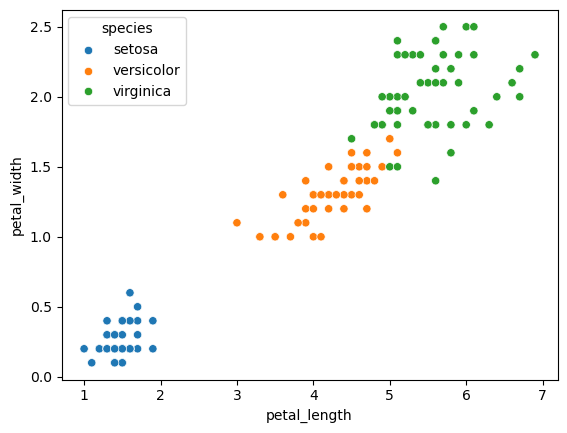

In [414]:
plt.figure()

sns.scatterplot(iris_df, x='petal_length', y='petal_width' , hue='species')

plt.show()

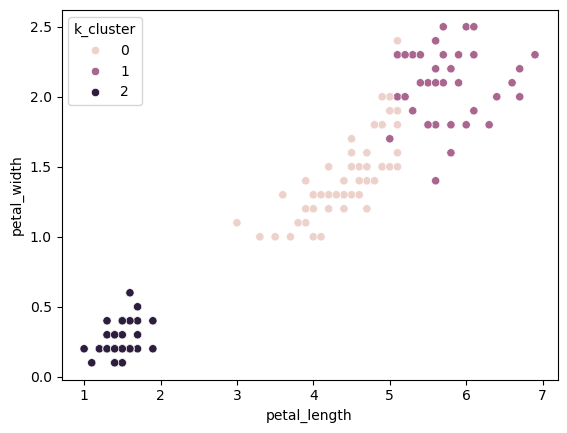

In [416]:
plt.figure()

sns.scatterplot(iris_df, x='petal_length', y='petal_width', hue='k_cluster')

plt.show()

In [428]:
inertia_list = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(iris_df.iloc[:, :4])
    inertia_list.append(k_means.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

In [430]:
inertia_list

[681.3706,
 152.3479517603579,
 78.85566582597731,
 57.38387326549494,
 49.849814510523345,
 47.9862268907563,
 38.11226003881176,
 30.568670564800364,
 27.983390977443612,
 27.036280875986762]

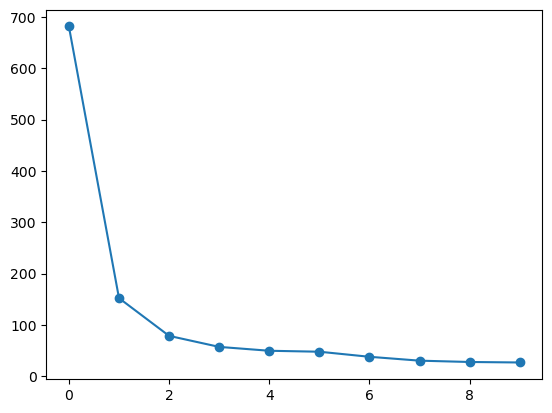

In [436]:
plt.figure()

plt.plot(inertia_list,marker='o')

# plt.savefig(r'저장경로\이름.png')
plt.show()

In [438]:
# df 연습
path = r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\졸업생 진로 현황 데이터\졸업생의 진로 현황(전체).xlsx'
grad_df = pd.read_excel(path)

In [444]:
grad_df.columns

use_cols = ['지역', '정보공시 \n 학교코드', '학교명', '졸업자.2', '(특수목적고)과학고 진학자.2', '(특수목적고)외고ㆍ국제고 진학자.2']

In [456]:
grad_df2 = grad_df[use_cols]
grad_df2.columns = ['reg', 'code', 'name', 'grad_N', 'sci_N', 'intl_N']
grad_df3 = grad_df2.drop(0)

In [458]:
grad_df3

reg        code              name grad_N sci_N intl_N
1        서울특별시 성북구  S000003514    서울대학교사범대학부설중학교    234     4      5
2        서울특별시 종로구  S000003562  서울대학교사범대학부설여자중학교    172     0      8
3        서울특별시 강남구  S010000698             개원중학교    214     2      9
4        서울특별시 서초구  S010000700             경원중학교    310     5      4
5        서울특별시 강남구  S010000701             구룡중학교    256     3      4
...            ...         ...               ...    ...   ...    ...
3454   제주특별자치도 제주시  S170000844             탐라중학교    298     1      1
3455   제주특별자치도 제주시  S170000512            제주영지학교     12     0      0
3456   제주특별자치도 제주시  S170000513            제주영송학교     21     0      0
3457  제주특별자치도 서귀포시  S170000790           서귀포온성학교      9     0      0
3458   제주특별자치도 제주시  S170000870  제주제일중학교부설방송통신중학교    NaN   NaN    NaN

[3458 rows x 6 columns]

In [460]:
path = r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\졸업생 진로 현황 데이터\공시대상학교정보(전체).xlsx'
school_info = pd.read_excel(path)

In [480]:
school_info.columns
info_col = ['정보공시 \n 학교코드',  '학교명', '위도', '경도']
school_info2 = school_info[info_col]
school_info2.columns = ['code', 'name', 'lat', 'log']

In [482]:
school_info2

code                name        lat         log
0      S000003511       서울교육대학교부설초등학교  37.490739  127.015424
1      S000003563     서울대학교사범대학부설초등학교  37.577017  127.003091
2      S010000737            서울개원초등학교  37.481618  127.058738
3      S010000738            서울개일초등학교  37.486214  127.057742
4      S010000741            서울구룡초등학교  37.481193  127.051755
...           ...                 ...        ...         ...
12179  S170000512              제주영지학교  33.488117  126.542748
12180  S170000513              제주영송학교  33.450047  126.434217
12181  S170000790             서귀포온성학교  33.291338  126.593310
12182  S170000155  제주제일고등학교부설방송통신고등학교  33.480030  126.479518
12183  S170000870    제주제일중학교부설방송통신중학교  33.495201  126.538850

[12184 rows x 4 columns]

In [484]:
# merge
# 항상 2개를 붙임
# 기준 : 교집합, 합집합, 한쪽기준

In [486]:
pd.merge(grad_df3, school_info2, left_on='code', right_on='code', how='inner')

reg        code            name_x grad_N sci_N intl_N  \
0        서울특별시 성북구  S000003514    서울대학교사범대학부설중학교    234     4      5   
1        서울특별시 종로구  S000003562  서울대학교사범대학부설여자중학교    172     0      8   
2        서울특별시 강남구  S010000698             개원중학교    214     2      9   
3        서울특별시 서초구  S010000700             경원중학교    310     5      4   
4        서울특별시 강남구  S010000701             구룡중학교    256     3      4   
...            ...         ...               ...    ...   ...    ...   
3459   제주특별자치도 제주시  S170000844             탐라중학교    298     1      1   
3460   제주특별자치도 제주시  S170000512            제주영지학교     12     0      0   
3461   제주특별자치도 제주시  S170000513            제주영송학교     21     0      0   
3462  제주특별자치도 서귀포시  S170000790           서귀포온성학교      9     0      0   
3463   제주특별자치도 제주시  S170000870  제주제일중학교부설방송통신중학교    NaN   NaN    NaN   

                name_y        lat         log  
0       서울대학교사범대학부설중학교  37.596201  127.039164  
1     서울대학교사범대학부설여자중학교  37.577928  127.003899  
2                개원중학교  37.491641  127.071415  
3                경원중학교  37.511582  127.009017  
4                구룡중학교  37.486153  127.056123  
...                ...        ...         ...  
3459             탐라중학교  33.491686  126.545093  
3460            제주영지학교  33.488117  126.542748  
3461            제주영송학교  33.450047  126.434217  
3462           서귀포온성학교  33.291338  126.593310  
3463  제주제일중학교부설방송통신중학교  33.495201  126.538850  

[3464 rows x 9 columns]

In [ ]:
# pandas
# 시리즈의 연산, 필터링, apply, groupby, pivot, merge

# 시각화(기계적으로)
# 연속된 숫자(히스토그램), 카테고리(카데고리 별 데이터의 개수)
# 관계시각화
# 숫자 * 숫자(산포도), 숫자 * 카테고리(박스플롯)

# 머신러닝
# EDA => feature engineering => 모델 사용